# Optimal Growth

In [81]:
import tensorflow as tf
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm
import datetime
from typing import Tuple
class Vector: pass

0.15405029000464884
[[0.13864526]
 [0.13880008]
 [0.13895491]
 [0.13910973]
 [0.13926455]
 [0.13941938]
 [0.13957421]
 [0.13972904]
 [0.13988386]
 [0.14003868]
 [0.1401935 ]
 [0.14034833]
 [0.14050315]
 [0.14065798]
 [0.1408128 ]
 [0.14096762]
 [0.14112245]
 [0.14127728]
 [0.1414321 ]
 [0.14158693]
 [0.14174175]
 [0.14189658]
 [0.1420514 ]
 [0.14220622]
 [0.14236104]
 [0.14251587]
 [0.14267069]
 [0.14282551]
 [0.14298034]
 [0.14313518]
 [0.14329   ]
 [0.14344482]
 [0.14359964]
 [0.14375447]
 [0.14390929]
 [0.14406411]
 [0.14421894]
 [0.14437376]
 [0.14452858]
 [0.1446834 ]
 [0.14483824]
 [0.14499307]
 [0.14514789]
 [0.14530271]
 [0.14545754]
 [0.14561236]
 [0.14576718]
 [0.145922  ]
 [0.14607683]
 [0.14623165]
 [0.14638647]
 [0.14654131]
 [0.14669614]
 [0.14685096]
 [0.14700578]
 [0.1471606 ]
 [0.14731543]
 [0.14747025]
 [0.14762507]
 [0.1477799 ]
 [0.14793472]
 [0.14808954]
 [0.14824438]
 [0.1483992 ]
 [0.14855403]
 [0.14870885]
 [0.14886367]
 [0.1490185 ]
 [0.14917332]
 [0.14932814]


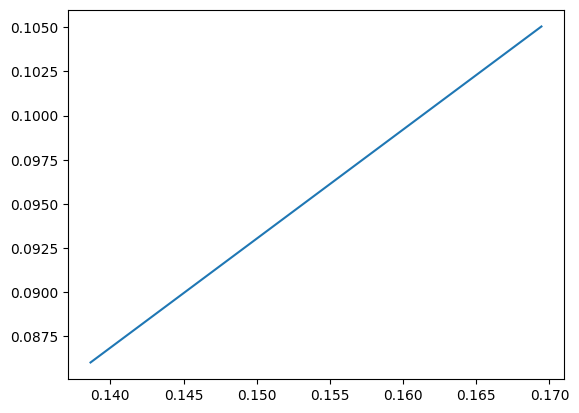

In [75]:
# Model parameters
A = 1
β = 0.9
α = 0.3
Kss = 1/(α*β*A)**(1/(α-1))
print(Kss)
xmin=Kss*0.9
xmax=Kss*1.1
min_FB = lambda a,b: a+b-tf.sqrt(a**2+b**2)
layers = [
    tf.keras.layers.Normalization(axis=-1, input_dim=1, mean=0, variance=1, invert=False),
    tf.keras.layers.Dense(32, activation='leaky_relu',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(32, activation='leaky_relu',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
]
perceptron = tf.keras.Sequential(layers)

def model(x:Vector)->Tuple[Vector]:
    sh = perceptron(x)
    return sh

λ=1
xvec = np.power(np.linspace(xmin**(1/λ),xmax**(1/λ),200,dtype='float32'),λ).reshape(-1,1)
print(xvec)
print(xvec.shape, model(xvec).shape)
plt.plot(xvec, model(xvec), label = 'c(x)')

In [76]:
def residuals(k:Vector):
    c=model(k)
    kp=A*k**α-c
    cp=model(kp)
    R = min_FB(A*k**α-c,c**(-1)-β*cp**(-1)*(A*α*kp**(α-1)))
    return R

print(residuals(xvec));

def J(n):
    x = tf.random.uniform(shape=(n,1),minval=xmin,maxval=xmax)
    R = residuals(x)
    R_squared = R*R
    return tf.reduce_mean(R_squared)

n = 500
v = J(n)
v.numpy()

tf.Tensor(
[[0.4557972 ]
 [0.45586967]
 [0.4559412 ]
 [0.45601273]
 [0.4560833 ]
 [0.45615387]
 [0.4562254 ]
 [0.456295  ]
 [0.4563656 ]
 [0.4564371 ]
 [0.45650673]
 [0.45657635]
 [0.45664597]
 [0.45671654]
 [0.4567852 ]
 [0.45685482]
 [0.45692444]
 [0.4569931 ]
 [0.45706272]
 [0.4571314 ]
 [0.45720005]
 [0.45726871]
 [0.45733643]
 [0.4574051 ]
 [0.4574728 ]
 [0.45754147]
 [0.45760918]
 [0.4576769 ]
 [0.45774364]
 [0.45781136]
 [0.45787907]
 [0.45794487]
 [0.45801258]
 [0.45807934]
 [0.4581461 ]
 [0.4582119 ]
 [0.45827866]
 [0.45834446]
 [0.45841026]
 [0.45847607]
 [0.45854187]
 [0.45860767]
 [0.45867348]
 [0.45873833]
 [0.45880318]
 [0.45886898]
 [0.45893383]
 [0.45899773]
 [0.45906258]
 [0.45912743]
 [0.45919132]
 [0.45925617]
 [0.45932007]
 [0.45938396]
 [0.45944786]
 [0.45951176]
 [0.4595747 ]
 [0.45963764]
 [0.45970154]
 [0.45976448]
 [0.45982742]
 [0.45989037]
 [0.4599533 ]
 [0.46001625]
 [0.46007824]
 [0.46014023]
 [0.46020222]
 [0.4602642 ]
 [0.46032715]
 [0.46038818]
 [0.46045

0.2136592

In [77]:
θ = perceptron.trainable_variables
print(str(θ)[:1000])

[<tf.Variable 'dense_18/kernel:0' shape=(1, 32) dtype=float32, numpy=
array([[-0.24483316,  0.05177191,  0.3762136 ,  0.17162806, -0.26122993,
        -0.14648572,  0.39710915, -0.00917032,  0.04747921, -0.3396394 ,
         0.16728199,  0.20263755,  0.3497566 ,  0.02784806,  0.05887452,
         0.0306274 , -0.06524068,  0.22514051, -0.29339477, -0.16842785,
        -0.38709027, -0.40363798, -0.06502932, -0.38426465, -0.23934534,
        -0.02035385, -0.20517236,  0.07145956, -0.15358987, -0.34484136,
        -0.03383636,  0.39140397]], dtype=float32)>, <tf.Variable 'dense_18/bias:0' shape=(32,) dtype=float32, numpy=
array([ 0.2590244 ,  0.39227846, -0.00736162, -0.05390689, -0.271605  ,
        0.32812425, -0.23784064,  0.00393295,  0.06550395, -0.3334501 ,
       -0.3409314 ,  0.22050056, -0.37705714, -0.03006029,  0.07331476,
       -0.13324025, -0.14385489, -0.10385233, -0.08603898, -0.41860393,
        0.10497949,  0.31679425, -0.04057378,  0.13247731, -0.4322709 ,
       -0.3858

In [78]:
from tensorflow.keras.optimizers import Adam, SGD
variables = perceptron.trainable_variables
optimizer = SGD()
optimizer.lr.assign(0.000001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-06>

In [79]:
@tf.function
def training_step():
    
    with tf.GradientTape() as tape:
        xx = J(n)
        
    grads = tape.gradient(xx,θ)
    optimizer.apply_gradients(zip(grads,θ))
    return xx

def train_me(K):
    vals=[]
    for k in tqdm(tf.range(K)):
        val=training_step()
        vals.append(val.numpy())
    return vals

In [100]:
results = train_me(50000)

100%|████████████████████████████████████| 50000/50000 [01:31<00:00, 548.32it/s]


In [70]:
results = train_me(500)

100%|████████████████████████████████████████| 500/500 [00:01<00:00, 300.15it/s]


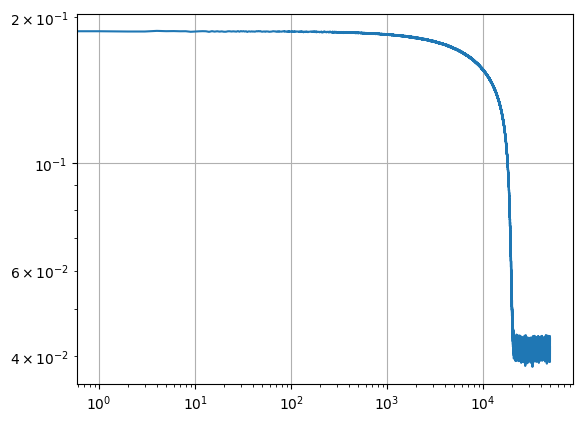

In [101]:
plt.plot(np.sqrt(results))
plt.xscale('log')
plt.yscale('log')
plt.grid()

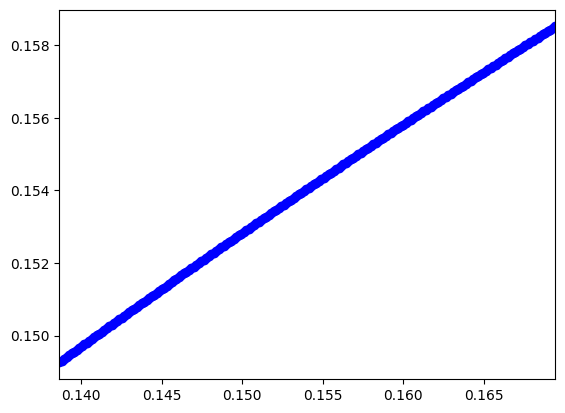

In [102]:
plt.plot(xvec,α*β*A*xvec**α, 'bo', label='True k(x)')
plt.xlim([xmin,xmax])
#plt.ylim([0,1])
plt.show()

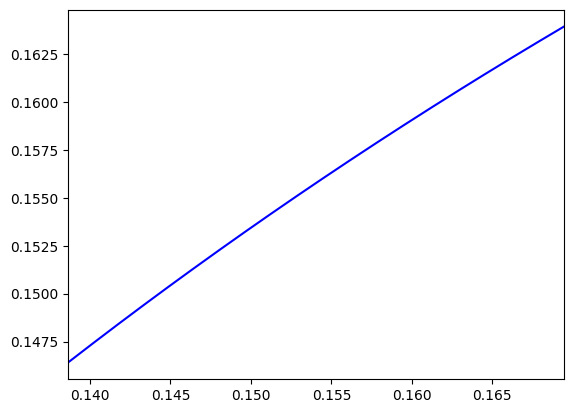

In [103]:
plt.plot(xvec,(A*xvec**α)-model(xvec),label='Solved c(x)',c='b')
plt.xlim([xmin,xmax])
plt.show()